In [4]:
import pandas as pd
df=pd.read_csv("weather_classification_data.csv")
print(df)

       Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0             14.0        73         9.5               82.0  partly cloudy   
1             39.0        96         8.5               71.0  partly cloudy   
2             30.0        64         7.0               16.0          clear   
3             38.0        83         1.5               82.0          clear   
4             27.0        74        17.0               66.0       overcast   
...            ...       ...         ...                ...            ...   
13195         10.0        74        14.5               71.0       overcast   
13196         -1.0        76         3.5               23.0         cloudy   
13197         30.0        77         5.5               28.0       overcast   
13198          3.0        76        10.0               94.0       overcast   
13199         -5.0        38         0.0               92.0       overcast   

       Atmospheric Pressure  UV Index  Season  Visibility (km) 

In [10]:
 selected_feature=['Temperature','Humidity','Wind Speed','Precipitation (%)','Cloud Cover','Season','Location']
target_column='Weather Type'
df_selected=df[selected_feature+[target_column]]
print(df_selected)

       Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0             14.0        73         9.5               82.0  partly cloudy   
1             39.0        96         8.5               71.0  partly cloudy   
2             30.0        64         7.0               16.0          clear   
3             38.0        83         1.5               82.0          clear   
4             27.0        74        17.0               66.0       overcast   
...            ...       ...         ...                ...            ...   
13195         10.0        74        14.5               71.0       overcast   
13196         -1.0        76         3.5               23.0         cloudy   
13197         30.0        77         5.5               28.0       overcast   
13198          3.0        76        10.0               94.0       overcast   
13199         -5.0        38         0.0               92.0       overcast   

       Season  Location Weather Type  
0      Winter    inland 

In [12]:
print(df_selected.isnull().sum())

Temperature          0
Humidity             0
Wind Speed           0
Precipitation (%)    0
Cloud Cover          0
Season               0
Location             0
Weather Type         0
dtype: int64


In [22]:
from sklearn.preprocessing import LabelEncoder
encoder={}
for colu in ['Cloud Cover','Season','Location','Weather Type']:
    le=LabelEncoder()
    df_selected.loc[:,colu]=le.fit_transform(df_selected[colu])
    encoder[colu]=le
print(df_selected['Season'].head())

0    3
1    1
2    1
3    1
4    3
Name: Season, dtype: int64


In [24]:
print(df_selected['Season'].unique())

[3 1 2 0]


In [34]:
print(encoder['Season'].inverse_transform([0,1,2,3]))

[0 1 2 3]


In [36]:
from sklearn.preprocessing import LabelEncoder

encoder = {}
for colu in ['Cloud Cover', 'Season', 'Location', 'Weather Type']:
    le = LabelEncoder()
    le.fit(df[colu])  # ✅ Use original unencoded column from full df
    df_selected.loc[:, colu] = le.transform(df[colu])  # ✅ Apply transform separately
    encoder[colu] = le

In [38]:
print(encoder['Season'].inverse_transform([0, 1, 2, 3]))


['Autumn' 'Spring' 'Summer' 'Winter']


In [40]:
print(encoder['Season'].classes_)


['Autumn' 'Spring' 'Summer' 'Winter']


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report

x=df_selected.drop('Weather Type',axis=1)
y=df_selected['Weather Type']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

model=GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)

print("\nClassification Report: ")
print(classification_report(y_test,y_pred))

Accuracy:  0.834469696969697

Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.80      0.78       651
           1       0.81      0.79      0.80       647
           2       0.91      0.94      0.93       701
           3       0.86      0.80      0.83       641

    accuracy                           0.83      2640
   macro avg       0.83      0.83      0.83      2640
weighted avg       0.84      0.83      0.83      2640



In [52]:
print(encoder['Weather Type'].classes_)

['Cloudy' 'Rainy' 'Snowy' 'Sunny']


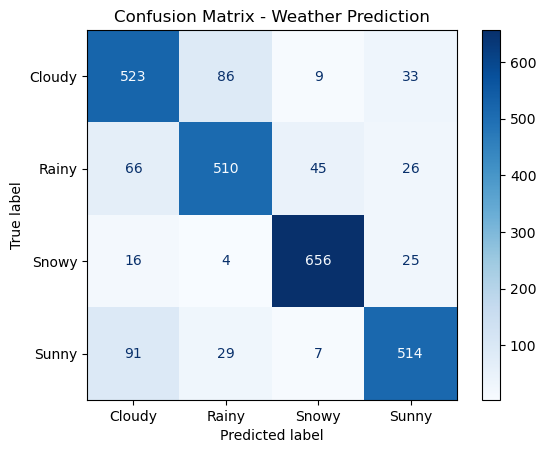

In [60]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,y_pred)

disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=encoder['Weather Type'].classes_)

disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Weather Prediction')
plt.show()